# Discretization of a function of a single variable. Differentiation through finite differences.

## 1 – Code to represent the function and the analytical and numerical derivative.

Consider the function

$$h(x) = \cos\left[\frac{\pi (x-1)}{2}\right] \exp\left[-\left(\frac{x-3}{2.5}\right)^2\right],\tag{1}$$

with $x \in (-4,10) $.

Let us define a sampling of $h$ with 64 intervals, that is, 65 points, and store the
values into double precision arrays called $xx$ and $hh$. Numpy arrays are double precision as 
default. To define $xx$ in Python you can use the commands:

`import numpy as np
nump=65
x0=-4.0 
xf=10.0
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0`

Use `matplotlib.pyplot` to visualize hh vs xx. 

Define the variable $nint$ as the number of intervals ($nint= 64$ in the present case)
and $nump$ as the number of points. In IDL, Python and C, those components go
from the $0-$component through the component $nump−1$. Compute the ratio (1) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization) using and filling the function `deriv_dnw` in `nm_lib`. Feel free to use any known library or create your own functions from scratch. 

It will depend on how you created the function that you have $nump$ or $nump−1$ elements. If the former, the last component ($nump-1$) is ill calculated. $hp$ contains a second-order approximation to the derivative of the $hh$ function at the intermediate points $x_{i+1/2}$.

## Tasks:

1. Plot $hh$ versus $xx$ as a solid line with crosses added at each grid point (to visualize the goodness of the discretization) or with `plt.hist` function combined with `plt.plot`. _Make sure the axis pixels are properly located either to the center or half grid shifted_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('default')

nump = 65
x0 = -4.0
xf = 10.0
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

nint = 64

def h(x):
    return np.cos( (np.pi * (x - 1) ) / 2 ) * np.exp( - ( (x - 3) / 2.5)**2 )
    

<span style="color:green">JMS</span>.

<span style="color:blue">GREAT. I like that you updated the requirements acordingly. You can also do that in nm_lib setup.cfg which will then automatically install with pip all the required libs.</span>.

<span style="color:orange">Minor comments: Add some minor comments in def functions, typically the description in functions are as follows</span>.

    r"""
    A sentences on what is the propose of the function.
    
    Requires
    ----------
    libraries or functions 

    Parameters
    ----------
    xx : `array`
        description and if applies what is the default values. 

    Returns
    ------- 
    t : `array`
        description 
    """

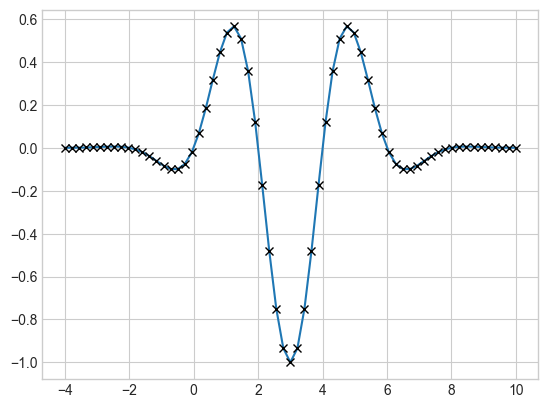

In [2]:
fig, ax = plt.subplots()
ax.plot(xx, h(xx))
ax.plot(xx, h(xx), 'x', c='k')

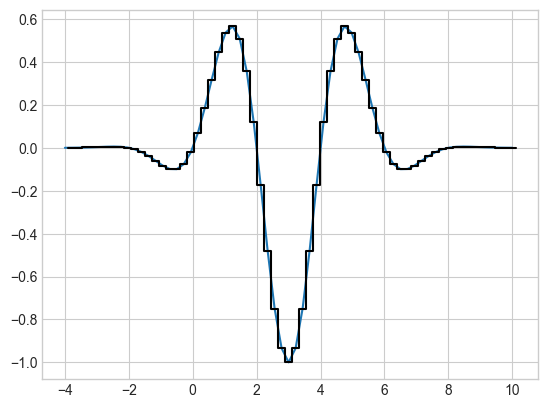

In [3]:
plt.plot(xx, h(xx))

pxl = xx[1] - xx[0]
hist = plt.step((xx+pxl/2), h(xx), c='k')

2. Plot the array containing the numerical derivative, $hp$. Calculate analytically the derivative of the function (1) and represent it in the same figure to ascertain the goodness of the approximation for that number of points. __hint__ _make sure the axis pixels are properly located either to the center or half grid shifted_. 

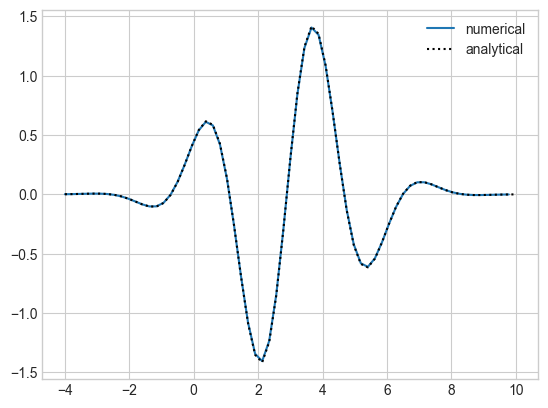

In [4]:
from nm_lib import nm_lib as nm

hp = nm.deriv_dnw(xx, h(xx))
plt.plot(xx[:-1], hp, label='numerical')

def analytical(xx):
    return np.exp( -0.16 * (-3 + xx)**2) * (1.5708 * np.cos((np.pi*xx) / 2) - (-0.96 + 0.32 * xx) * np.sin((np.pi * xx) / 2))

an = analytical(xx+pxl/2)
plt.plot(xx, an, label='analytical', ls=':', c='k')

plt.legend()

3. Repeat the foregoing, but now using $nint= 32$ and $nint= 16$ intervals to see how the approximation deteriorates. Thereafter, repeat the same process for 128 and 256 intervals, to see how it improves. Consider to use `plt.semilogy` for the error. 

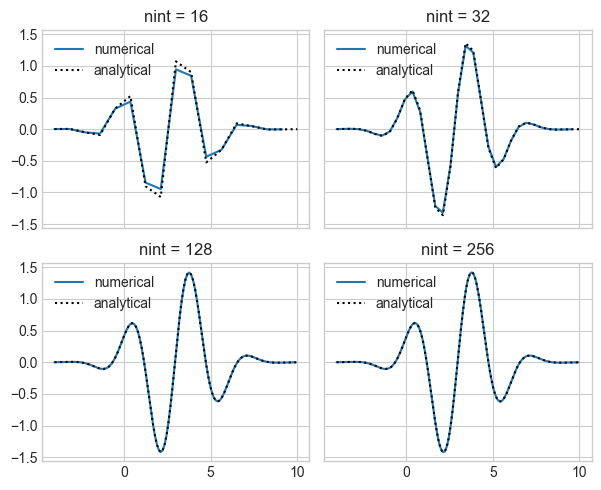

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(6, 5), sharex=True, sharey=True)

def plot_comparison(ax, nint):
    nump = nint + 1.0
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
    pxl = xx[1] - xx[0]
    hp = nm.deriv_dnw(xx, h(xx))

    ax.plot(xx[:-1], hp, label='numerical')
    ax.plot(xx, analytical(xx+pxl/2), label='analytical', ls=':', c='k')
    ax.legend()
    ax.set_title(f'nint = {nint}')


plot_comparison(ax[0, 0], nint=16)
plot_comparison(ax[0, 1], nint=32)
plot_comparison(ax[1, 0], nint=128)
plot_comparison(ax[1, 1], nint=256)

plt.tight_layout()

<span style="color:green">JMS</span>.

<span style="color:blue">good.</span>.

<span style="color:red">please explain with a few sentences what did you do and what are the results.</span>.


## 2- Test of the quadratic order of the approximation.

We are going to test if the ratio $(h_{i+1}-h_i)/(x_{i+1}-x_i)$ approaches the analytical value of the derivative. To that end, we will use samplings with, successively, 16, 32, 64, 128, 256, 512 and 1024 intervals (which are successive powers of 2). Calculate the maximum of the absolute value of the error, meaning: the difference between the analytical and the numerical derivatives at the _same points_. Plot a graph of that value versus the size of the interval in each case using a diagram with logarithmic axes. Check if the curve you get corresponds to a quadratic dependence.

NameError: name 'n' is not defined

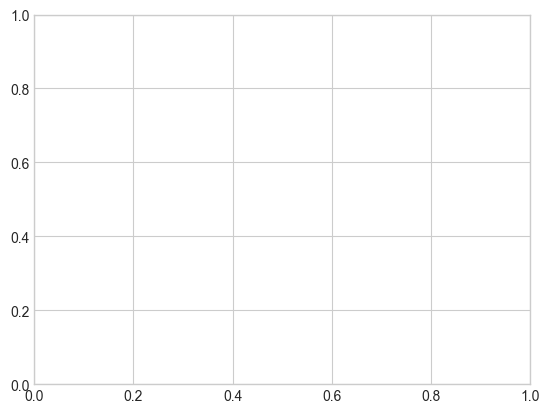

In [6]:
def calculate_error(nint):
    nump = nint + 1.0
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
    pxl = xx[1] - xx[0]
    hp = nm.deriv_dnw(xx, h(xx))

    return np.max(np.abs(hp - analytical(xx+pxl/2)[:-1]))


fig, ax = plt.subplots()

for nint in [16, 32, 64, 128, 256, 512, 1024]:
    ax.scatter(nint, calculate_error(nint), label=f'nint = {n}', marker='x')

ax.set(xscale='log', yscale='log', xlabel='Number of intervals', ylabel='Maximum error')
ax.legend()

<span style="color:green">JMS</span>.

<span style="color:red">I get an error here.</span>.

     ---------------------------------------------------------------------------
     NameError                                 Traceback (most recent call last)
     Cell In[6], line 13
          10 fig, ax = plt.subplots()
          12 for nint in [16, 32, 64, 128, 256, 512, 1024]:
     ---> 13     ax.scatter(nint, calculate_error(nint), label=f'nint = {n}', marker='x')
          15 ax.set(xscale='log', yscale='log', xlabel='Number of intervals', ylabel='Maximum error')
          16 ax.legend()

     NameError: name 'n' is not defined

## 3- Improving the accuracy of the test of the quadratic order of the approximation.

To test the accuracy of the result of the previous paragraph:

1. extend the test to a larger range of number of intervals (including 2048, 4096, 8192, 16384). Make sure to use double precision variables throughout the program (meaning: all variables except the array indices).

2. then try to fit a straight to the logarithm of the error curves using Python program `numpy.polyfit` and `numpy.poly1d`. From the value of the slope you get from that program, check the accuracy with which you obtain the quadratic dependence.

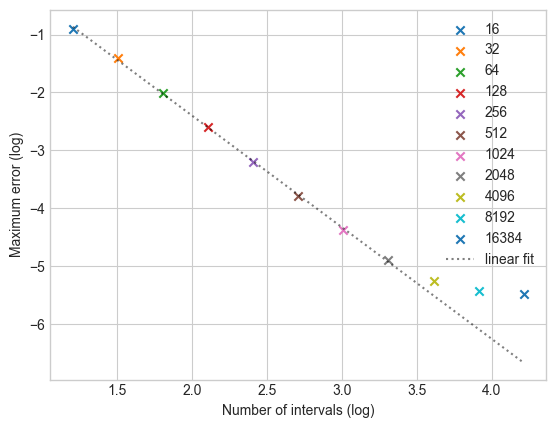

In [8]:
fig, ax = plt.subplots()

errors = []
nints  = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384] 

for i, n in enumerate(nints):
    errors.append(np.double(calculate_error(n)))
    ax.scatter(np.log10(n), np.log10(errors[i]), label=f'{n}', marker='x')

line = np.poly1d(np.polyfit(np.log10(nints[:-3]), np.log10(errors[:-3]), deg=1))
ax.plot(np.log10(nints), line(np.log10(nints)), label='linear fit', ls=':', c='k', alpha=0.5)

ax.set(xlabel='Number of intervals (log)', ylabel='Maximum error (log)')
ax.legend()

*Here i have excluded the last 3 points, as they do not behave in a nice, linear way.*

<span style="color:green">JMS</span>.

<span style="color:red">Please, explain why do you think that is happening and what(how) did you solve the task.</span>.

## 4- Analytical proof of the order of convergence of the approximation for the derivative (optional)

Consider the sampling used in exercise this, assuming that the spacing between grid points is uniform, i.e., $(\Delta x)_i = \Delta x$. Write a formal Taylor expansion as follows:


$$f(x_{i+1}) = f(x_{i+1/2}) + f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{2}$$

$$f(x_{i}) = f(x_{i+1/2}) - f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{3}$$

including terms up to order $(\Delta x)^3$. Eliminating terms combining those two expressions, conclude that, as said in the previous exercise sheet, the finite-difference approximation to the derivative at the midpoints $x_{i+1/2}$ carried out there is of 2nd order.

<span style="color:green">JMS</span>.

<span style="color:yellow">optional, but it would be nice if you can add some sentences, not necessarily to do all the derivations </span>.